<h1>Импорт библиотек</h1>

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [7]:
def sum_prod(X, V):
    total = np.zeros_like(X[0] @ V[0])
    
    for mat, vec in zip(X, V):
        total += mat @ vec 
    
    return total

class TestSumProd(unittest.TestCase):
    def test_single_matrix(self):
        X = [np.array([[1, 2], [3, 4]])]
        V = [np.array([[1], [2]])]
        expected = np.array([[5], [11]])
        self.assertTrue(np.allclose(sum_prod(X, V), expected))
    
    def test_multiple_matrices(self):
        X = [np.eye(2), np.eye(2) * 2]
        V = [np.ones((2, 1)) for _ in range(2)]
        expected = np.array([[3], [3]])
        self.assertTrue(np.allclose(sum_prod(X, V), expected))
    
    def test_larger_dimension(self):
        X = [np.ones((3, 3)) for _ in range(2)]
        V = [np.array([[1], [2], [3]]) for _ in range(2)]
        expected = np.array([[12], [12], [12]])
        self.assertTrue(np.allclose(sum_prod(X, V), expected))

unittest.main(argv=[''], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [8]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

class TestBinarize(unittest.TestCase):
    def test_default_threshold(self):
        M = np.array([[0.1, 0.6], [0.4, 0.9]])
        expected = np.array([[0, 1], [0, 1]])
        self.assertTrue(np.array_equal(binarize(M), expected))
    
    def test_custom_threshold(self):
        M = np.array([[0.2, 0.4], [0.1, 0.5]])
        expected = np.array([[0, 1], [0, 1]])
        self.assertTrue(np.array_equal(binarize(M, 0.3), expected))
    
    def test_all_below_threshold(self):
        M = np.array([[0.1, 0.2], [0.3, 0.4]])
        expected = np.array([[0, 0], [0, 0]])
        self.assertTrue(np.array_equal(binarize(M, 0.5), expected))

unittest.main(argv=[''], exit=False)

......
----------------------------------------------------------------------
Ran 6 tests in 0.003s

OK


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [9]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

class TestUniqueElements(unittest.TestCase):
    def setUp(self):
        self.mat = np.array([
            [1, 2, 3],
            [1, 1, 2],
            [3, 3, 3]
        ])
    
    def test_unique_rows(self):
        expected = [np.array([1, 2, 3]), np.array([1, 2]), np.array([3])]
        for i, row in enumerate(unique_rows(self.mat)):
            self.assertTrue(np.array_equal(row, expected[i]))
    
    def test_unique_columns(self):
        expected = [np.array([1, 3]), np.array([1, 2, 3]), np.array([2, 3])]
        for i, col in enumerate(unique_columns(self.mat)):
            self.assertTrue(np.array_equal(col, expected[i]))

unittest.main(argv=[''], exit=False)

........
----------------------------------------------------------------------
Ran 8 tests in 0.005s

OK


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

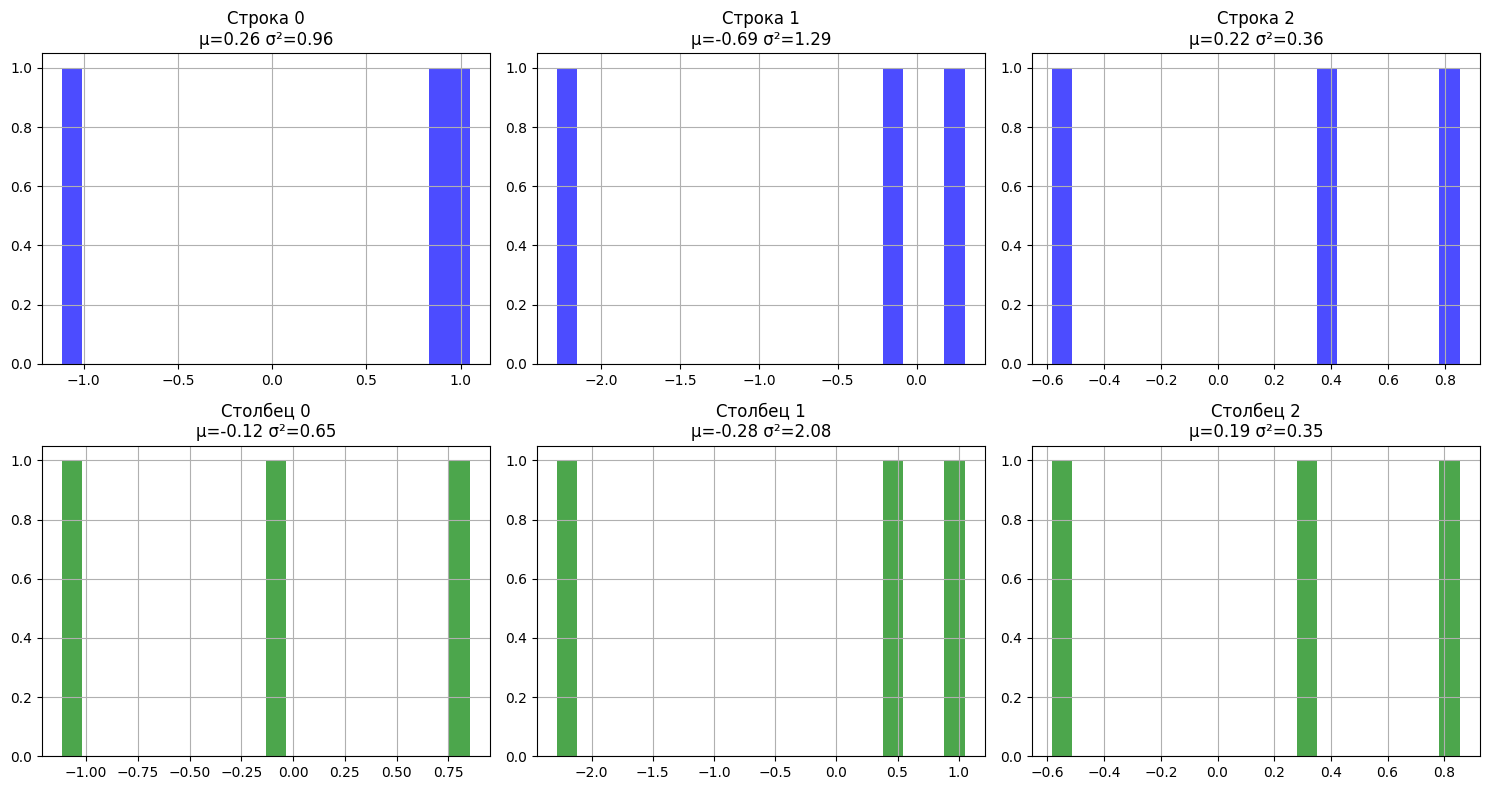

Сгенерированная матрица:
[[-1.11507829  1.04840663  0.85416153]
 [-0.10515132 -2.28182242  0.3053334 ]
 [ 0.85231526  0.40024637 -0.58361939]]

Статистики:
Мат. ожидание строк: [ 0.26249663 -0.69388011  0.22298075]
Дисперсия строк: [0.95514485 1.28886333 0.35936294]
Мат. ожидание столбцов: [-0.12263812 -0.27772314  0.19195851]
Дисперсия столбцов: [0.64525913 2.07822559 0.3509626 ]


In [12]:
def generate_and_analyze_matrix(rows, cols, mu=0, sigma=1):
    mat = np.random.normal(loc=mu, scale=sigma, size=(rows, cols))
    
    row_means = np.mean(mat, axis=1)
    row_variances = np.var(mat, axis=1)
    col_means = np.mean(mat, axis=0)
    col_variances = np.var(mat, axis=0)
    
    plt.figure(figsize=(15, 8))
    
    for i in range(rows):
        plt.subplot(2, rows, i+1)
        plt.hist(mat[i, :], bins=20, alpha=0.7, color='blue')
        plt.title(f'Строка {i}\nμ={row_means[i]:.2f} σ²={row_variances[i]:.2f}')
        plt.grid(True)
    
    for j in range(cols):
        plt.subplot(2, cols, rows+j+1)
        plt.hist(mat[:, j], bins=20, alpha=0.7, color='green')
        plt.title(f'Столбец {j}\nμ={col_means[j]:.2f} σ²={col_variances[j]:.2f}')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return (row_means, row_variances, col_means, col_variances), mat

stats, matrix = generate_and_analyze_matrix(rows=3, cols=3)

print("Сгенерированная матрица:")
print(matrix)

print("\nСтатистики:")
print("Мат. ожидание строк:", stats[0])
print("Дисперсия строк:", stats[1])
print("Мат. ожидание столбцов:", stats[2])
print("Дисперсия столбцов:", stats[3])

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [13]:
def chess(m, n, a, b):
    mat = np.empty((m, n), dtype=type(a))
    for i in range(m):
        for j in range(n):
            mat[i, j] = a if (i + j) % 2 == 0 else b
    return mat

class TestChessPattern(unittest.TestCase):
    def test_even_square_matrix(self):
        expected = np.array([[0, 1], [1, 0]])
        self.assertTrue(np.array_equal(chess(2, 2, 0, 1), expected))
    
    def test_odd_rectangular_matrix(self):
        expected = np.array([[1, 0, 1], [0, 1, 0]])
        self.assertTrue(np.array_equal(chess(2, 3, 1, 0), expected))
    
    def test_string_values(self):
        expected = np.array([['A', 'B'], ['B', 'A']])
        self.assertTrue(np.array_equal(chess(2, 2, 'A', 'B'), expected))

unittest.main(argv=[''], exit=False)

...........
----------------------------------------------------------------------
Ran 11 tests in 0.004s

OK


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

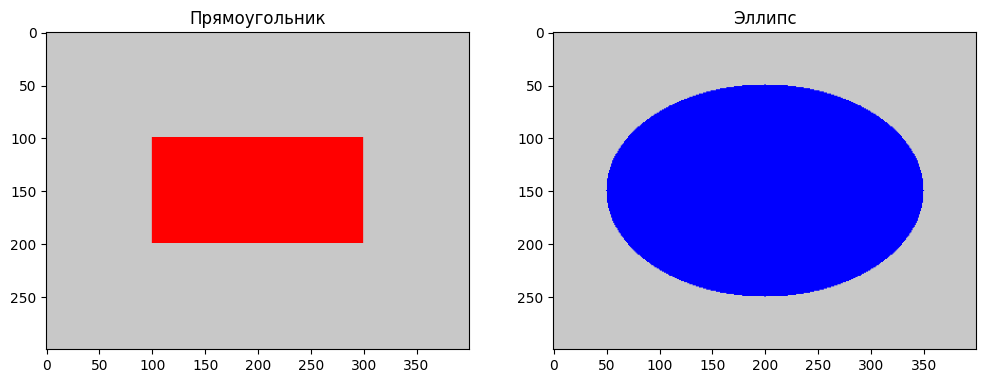

..............
----------------------------------------------------------------------
Ran 14 tests in 0.014s

OK


In [18]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color
    
    y_start = (m - a) // 2
    y_end = y_start + a
    x_start = (n - b) // 2
    x_end = x_start + b
    
    image[y_start:y_end, x_start:x_end] = rectangle_color
    
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color
    
    center_y, center_x = m // 2, n // 2
    
    for y in range(m):
        for x in range(n):
            if ((x - center_x) / b)**2 + ((y - center_y) / a)**2 <= 1:
                image[y, x] = ellipse_color
                
    return image

rect_img = draw_rectangle(100, 200, 300, 400, 
                        rectangle_color=(255, 0, 0), 
                        background_color=(200, 200, 200))

ellipse_img = draw_ellipse(100, 150, 300, 400,
                          ellipse_color=(0, 0, 255),
                          background_color=(200, 200, 200))

# Отображение результатов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(rect_img)
plt.title("Прямоугольник")

plt.subplot(1, 2, 2)
plt.imshow(ellipse_img)
plt.title("Эллипс")
plt.show()

class TestDrawingFunctions(unittest.TestCase):
    def test_rectangle_dimensions(self):
        img = draw_rectangle(50, 100, 200, 200, (255,0,0), (0,0,0))
        # Проверяем количество пикселей прямоугольника
        # Учитываем возможное округление координат
        rect_pixels = np.sum(np.all(img == (255,0,0), axis=-1))
        self.assertAlmostEqual(rect_pixels, 50*100, delta=10)  # Допуск 10 пикселей
        
    def test_ellipse_area(self):
        img = draw_ellipse(50, 50, 100, 100, (0,255,0), (0,0,0))
        # Теоретическая площадь эллипса πab (a=b=50)
        expected_area = math.pi * 50 * 50
        # Реальная площадь (количество пикселей)
        actual_area = np.sum(np.all(img == (0,255,0), axis=-1))
        # Допустимая погрешность 5% от площади
        self.assertAlmostEqual(actual_area, expected_area, delta=0.05*expected_area)
        
    def test_background_color(self):
        img = draw_rectangle(10, 10, 100, 100, (1,2,3), (4,5,6))
        # Проверяем угловые пиксели фона
        self.assertTrue(np.all(img[0,0] == (4,5,6)))
        self.assertTrue(np.all(img[-1,-1] == (4,5,6)))

unittest.main(argv=['first-arg-is-ignored'], exit=False)

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

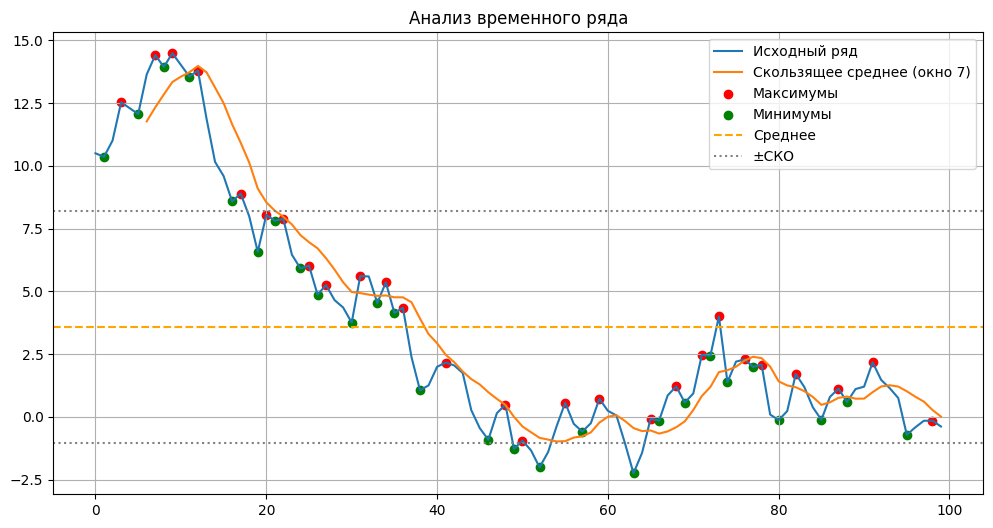

Среднее значение: 3.59
Дисперсия: 21.35
СКО: 4.62
Найдено 27 максимумов
Найдено 27 минимумов


In [19]:
def analyze_time_series(series, window_size=5, plot_results=True):
    series = np.array(series)
    
    mean = np.mean(series)
    variance = np.var(series)
    std = np.std(series)
    
    max_indices = []
    min_indices = []
    
    for i in range(1, len(series)-1):
        if series[i-1] < series[i] > series[i+1]:
            max_indices.append(i)
        elif series[i-1] > series[i] < series[i+1]:
            min_indices.append(i)
    
    moving_avg = np.convolve(series, np.ones(window_size)/window_size, mode='valid')
    
    if plot_results:
        plt.figure(figsize=(12, 6))
        plt.plot(series, label='Исходный ряд')
        plt.plot(range(window_size-1, len(series)), moving_avg, 
                label=f'Скользящее среднее (окно {window_size})')
        
        if max_indices:
            plt.scatter(max_indices, series[max_indices], color='red', label='Максимумы')
        if min_indices:
            plt.scatter(min_indices, series[min_indices], color='green', label='Минимумы')
        
        plt.axhline(mean, color='orange', linestyle='--', label='Среднее')
        plt.axhline(mean + std, color='gray', linestyle=':', label='±СКО')
        plt.axhline(mean - std, color='gray', linestyle=':')
        
        plt.legend()
        plt.grid(True)
        plt.title('Анализ временного ряда')
        plt.show()
    
    return {
        'mean': mean,
        'variance': variance,
        'std': std,
        'max_indices': np.array(max_indices),
        'min_indices': np.array(min_indices),
        'moving_average': moving_avg
    }

np.random.seed(42)
test_data = np.cumsum(np.random.randn(100)) + 10

results = analyze_time_series(test_data, window_size=7)

print(f"Среднее значение: {results['mean']:.2f}")
print(f"Дисперсия: {results['variance']:.2f}")
print(f"СКО: {results['std']:.2f}")
print(f"Найдено {len(results['max_indices'])} максимумов")
print(f"Найдено {len(results['min_indices'])} минимумов")

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [22]:
import numpy as np

def one_hot_encoding(labels):
    labels = np.asarray(labels)
    num_classes = np.max(labels) + 1
    
    encoded = np.zeros((len(labels), num_classes))
    encoded[np.arange(len(labels)), labels] = 1
    return encoded

labels = [0, 2, 3, 0]
encoded = one_hot_encoding(labels)
print(encoded)

..........F......
FAIL: test_non_sequential_labels (__main__.TestOneHotEncoding.test_non_sequential_labels)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Temp\ipykernel_456\2546599465.py", line 24, in test_non_sequential_labels
    self.assertTrue(np.array_equal(result, expected))
    ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: False is not true

----------------------------------------------------------------------
Ran 17 tests in 0.016s

FAILED (failures=1)


[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
